In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

In [62]:
df=pd.read_csv('IMDB-Movie-Data.csv')

In [63]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [4]:
def check_dataframe(dataframe, head=5):
    print('########## head ##########')
    print(dataframe.head(head))
    print('########## ndim ##########')
    print(dataframe.ndim)
    print('########## shape ##########')
    print(dataframe.shape)
    print('########## isnull ##########')
    print(dataframe.isnull().sum().sum())
    print('########## describe ##########')
    print(dataframe.describe().T)
    print('########## tail ##########')
    print(dataframe.tail(head))

check_dataframe(df)    

########## head ##########
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S.

In [5]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
def grab_col_name(dataframe, cat_th=5, car_th=10):
    
    # Category
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes=='O']
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes !='O']
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes=='O']
    cat_cols=cat_cols+num_but_cat        
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
 # Number
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes !='O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    
    print(f'Gozlem sayisi {dataframe.shape[0]}')
    print(f'Deyisken sayisi {dataframe.shape[1]}')
    print(f'categorik deyiskenler {len(cat_cols)}')
    print(f'number but categorik {len(num_but_cat)}')
    print(f'cardinal {len(cat_but_car)}')
    print(f'number {len(num_cols)}')
    
    return cat_cols, num_but_cat, cat_but_car ,num_cols   

In [8]:
cat_cols, num_but_cat, cat_but_car ,num_cols=grab_col_name(df)

Gozlem sayisi 1000
Deyisken sayisi 12
categorik deyiskenler 0
number but categorik 0
cardinal 5
number 7


In [9]:
cat_cols

[]

In [10]:
num_but_cat

[]

In [11]:
cat_but_car

['Title', 'Genre', 'Description', 'Director', 'Actors']

In [12]:
num_cols

['Rank',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [13]:
def missing_values_df(dataframe):
    missing=[col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    sorts_v=dataframe[missing].isnull().sum().sort_values(ascending=False)
    ratio=(dataframe[missing].isnull().sum() * 100 / len(dataframe))
    concat=pd.concat([sorts_v, np.round(ratio,2)], axis=1, keys=['missing_values','ratio'])
    print(concat)

In [14]:
missing_values_df(df)

                    missing_values  ratio
Revenue (Millions)             128   12.8
Metascore                       64    6.4


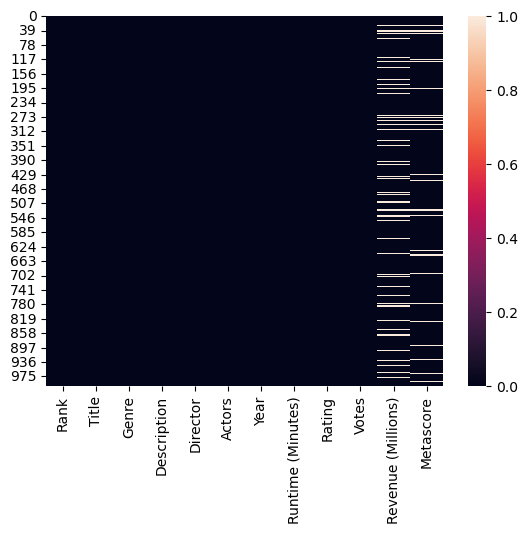

In [15]:
sns.heatmap(df.isnull());

In [16]:
datafr=df.duplicated().any()
datafr

False

In [18]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [19]:
# 9. Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes
df[df['Runtime (Minutes)'] >= 180]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
82,83,The Wolf of Wall Street,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
311,312,La vie d'Adèle,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN
965,966,Inland Empire,"Drama,Mystery,Thriller",As an actress starts to adopt the persona of h...,David Lynch,"Laura Dern, Jeremy Irons, Justin Theroux, Karo...",2006,180,7.0,44227,NaN,NaN


In [20]:
# 10. In Which Year There Was The Highest Average Voting?
df.groupby('Year').agg({'Votes':'mean'})

,Votes
Year,
2006,269289.954545
2007,244331.037736
2008,275505.384615
2009,255780.647059
2010,252782.316667
2011,240790.301587
2012,285226.093750
2013,219049.648352
2014,203930.224490


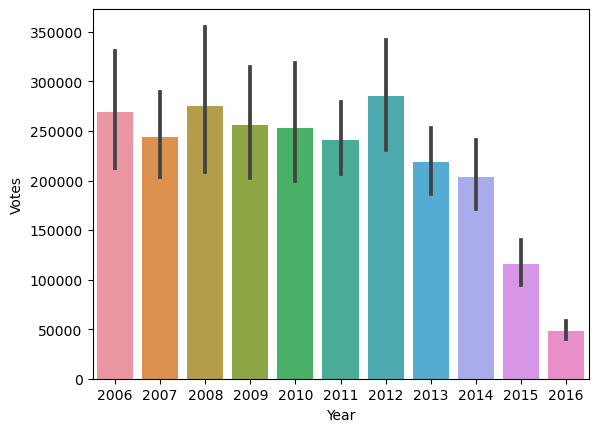

In [21]:
sns.barplot(x='Year', y='Votes', data=df);

In [22]:
# 11. In Which Year There Was The Highest Average Revenue?
df.groupby('Year').agg({'Revenue (Millions)' :'mean'})

,Revenue (Millions)
Year,
2006,86.296667
2007,87.882245
2008,99.082745
2009,112.601277
2010,105.081579
2011,87.612258
2012,107.973281
2013,87.121818
2014,85.078723


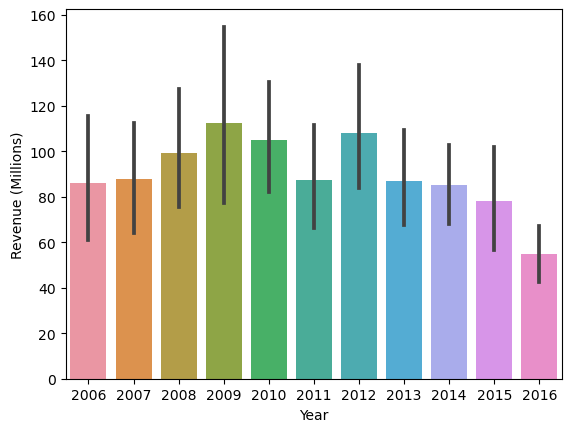

In [23]:
sns.barplot(x='Year', y='Revenue (Millions)', data=df);

In [11]:
df.groupby('Year').agg({'Revenue (Millions)' :'mean'}).sort_values(by='Year', ascending=False)

,Revenue (Millions)
Year,
2016,54.690976
2015,78.355044
2014,85.078723
2013,87.121818
2012,107.973281
2011,87.612258
2010,105.081579
2009,112.601277
2008,99.082745


In [6]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [7]:
# 12. Find The Average Rating For Each Director
df.pivot_table('Rating','Director')

,Rating
Director,
Aamir Khan,8.50
Abdellatif Kechiche,7.80
Adam Leon,6.50
Adam McKay,7.00
Adam Shankman,6.30
...,...
Xavier Dolan,7.55
Yimou Zhang,6.10
Yorgos Lanthimos,7.20


In [27]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [28]:
# 13. Display Top 10 Lengthy Movies Title and Runtime
X1=df.nlargest(10, 'Revenue (Millions)')[['Title','Revenue (Millions)']]
X1

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


In [29]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [30]:
# 14. Display Number of Movies Per Year
df['Year'].value_counts()

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

In [31]:
# 15. Find Most Popular Movie Title (Highest Revenue)
df.loc[df['Runtime (Minutes)'].max()==df['Runtime (Minutes)']]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN


In [32]:
# 16. Display Top 10 Highest Rated Movie Titles And its Directors
df.loc[(df['Rating']>=6.7) & (df['Year'] >=2011)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,980,The Skin I Live In,"Drama,Thriller","A brilliant plastic surgeon, haunted by past t...",Pedro Almodóvar,"Antonio Banderas, Elena Anaya, Jan Cornet,Mari...",2011,120,7.6,108772,3.19,70.0
980,981,Miracles from Heaven,"Biography,Drama,Family",A young girl suffering from a rare digestive d...,Patricia Riggen,"Jennifer Garner, Kylie Rogers, Martin Henderso...",2016,109,7.0,12048,61.69,44.0
984,985,Max,"Adventure,Family",A Malinois dog that helped American Marines in...,Boaz Yakin,"Thomas Haden Church, Josh Wiggins, Luke Kleint...",2015,111,6.8,21405,42.65,47.0
989,990,Selma,"Biography,Drama,History",A chronicle of Martin Luther King's campaign t...,Ava DuVernay,"David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...",2014,128,7.5,67637,52.07,NaN


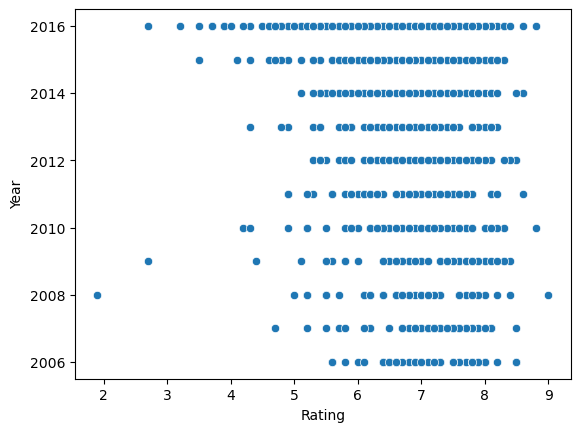

In [33]:
sns.scatterplot(x='Rating', y='Year', data=df);

In [34]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [35]:
# 17. Display Top 10 Highest Revenue Movie Titles
df.nlargest(10,'Revenue (Millions)')['Title']

50     Star Wars: Episode VII - The Force Awakens
87                                         Avatar
85                                 Jurassic World
76                                   The Avengers
54                                The Dark Knight
12                                      Rogue One
119                                  Finding Dory
94                        Avengers: Age of Ultron
124                         The Dark Knight Rises
578               The Hunger Games: Catching Fire
Name: Title, dtype: object

In [36]:
# 18.  Find Average Rating of Movies Year Wise
df.groupby('Year').agg({'Rating':'mean'})

,Rating
Year,
2006,7.125000
2007,7.133962
2008,6.784615
2009,6.960784
2010,6.826667
2011,6.838095
2012,6.925000
2013,6.812088
2014,6.837755


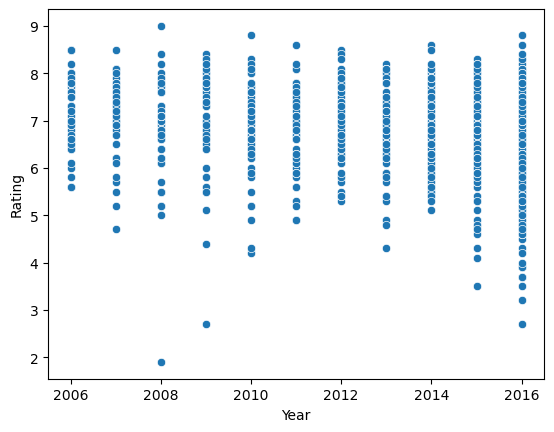

In [37]:
sns.scatterplot(x='Year', y='Rating', data=df);

In [38]:
# 19. Does Rating Affect The Revenue?
df.groupby('Rating').agg({'Revenue (Millions)':'mean'})

,Revenue (Millions)
Rating,
1.9,14.170000
2.7,9.350000
3.2,NaN
3.5,NaN
3.7,NaN
3.9,47.730000
4.0,20.760000
4.1,166.150000
4.2,NaN


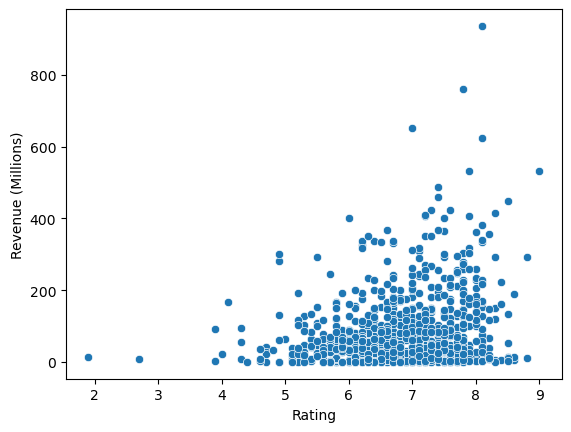

In [39]:
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=df);

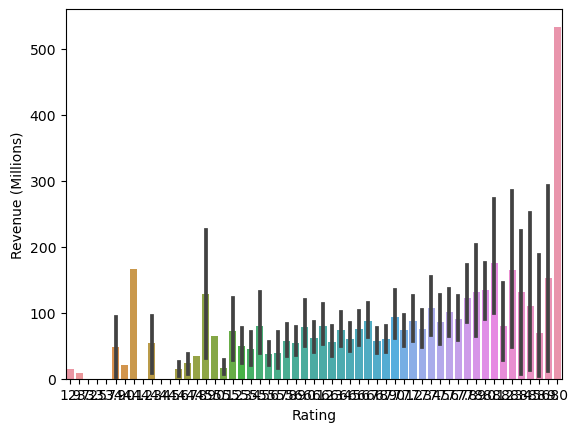

In [40]:
sns.barplot(x='Rating', y='Revenue (Millions)', data=df);

In [41]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [42]:
# 20. Classify Movies Based on Ratings [Excellent, Good, and Average]
df['New_Rating']=pd.qcut(df['Rating'], 3,['Good', 'Average','Excellent'])

In [43]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,New_Rating
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Average
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0,Good
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,Good
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,Good
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0,Good


In [44]:
df['New_Rating'].value_counts()

New_Rating
Good         357
Average      338
Excellent    305
Name: count, dtype: int64

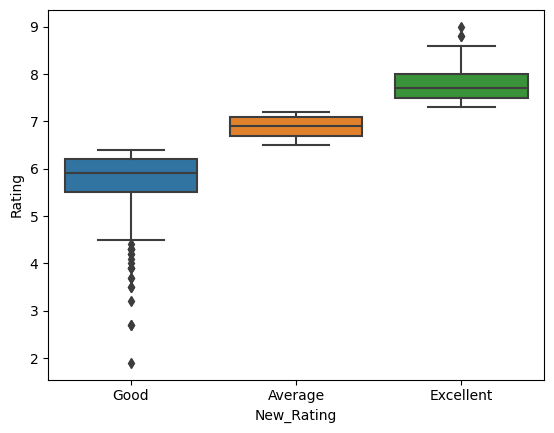

In [45]:
sns.boxplot(x='New_Rating', y='Rating', data=df);

In [46]:
df.head(12)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,New_Rating
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Average
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Good
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Excellent
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Good
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Average
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Average


In [47]:
# 21. Count Number of Action Movies
df[(df['Genre']=='Action')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,New_Rating
123,124,Boyka: Undisputed IV,Action,In the fourth installment of the fighting fran...,Todor Chapkanov,"Scott Adkins, Teodora Duhovnikova, Alon Aboutb...",2016,86,7.4,10428,NaN,NaN,Excellent
580,581,Kickboxer: Vengeance,Action,A kick boxer is out to avenge his brother.,John Stockwell,"Dave Bautista, Alain Moussi, Gina Carano, Jean...",2016,90,4.9,6809,131.56,37.0,Good


In [48]:
df.nunique()

Rank                  1000
Title                  999
Genre                  207
Description           1000
Director               644
Actors                 996
Year                    11
Runtime (Minutes)       94
Rating                  55
Votes                  997
Revenue (Millions)     814
Metascore               84
New_Rating               3
dtype: int64

In [49]:
df['Genre'].value_counts()

Genre
Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: count, Length: 207, dtype: int64

In [45]:
df.head(12)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [55]:
df.loc[(df['Runtime (Minutes)'] < 121) & (df['Genre']=='Horror,Thriller')]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
116,117,The Neon Demon,"Horror,Thriller",When aspiring model Jesse moves to Los Angeles...,Nicolas Winding Refn,"Elle Fanning, Christina Hendricks, Keanu Reeve...",2016,118,6.2,50359,1.33,51.0
361,362,Clown,"Horror,Thriller",A loving father finds a clown suit for his son...,Jon Watts,"Andy Powers, Laura Allen, Peter Stormare, Chri...",2014,100,5.7,14248,0.05,42.0
382,383,Hush,"Horror,Thriller",A deaf writer who retreated into the woods to ...,Mike Flanagan,"John Gallagher Jr., Kate Siegel, Michael Trucc...",2016,81,6.6,45867,NaN,67.0
477,478,Pet,"Horror,Thriller",A psychological thriller about a man who bumps...,Carles Torrens,"Dominic Monaghan, Ksenia Solo, Jennette McCurd...",2016,94,5.7,8404,NaN,48.0
531,532,Friend Request,"Horror,Thriller",When a college student unfriends a mysterious ...,Simon Verhoeven,"Alycia Debnam-Carey, William Moseley, Connor P...",2016,92,5.4,12758,64.03,59.0
723,724,Blair Witch,"Horror,Thriller",After discovering a video showing what he beli...,Adam Wingard,"James Allen McCune, Callie Hernandez, Corbin R...",2016,89,5.1,26088,20.75,47.0
736,737,The Blackcoat's Daughter,"Horror,Thriller",Two girls must battle a mysterious evil force ...,Oz Perkins,"Emma Roberts, Kiernan Shipka, Lauren Holly, Lu...",2015,93,5.6,4155,0.02,68.0
748,749,Ouija: Origin of Evil,"Horror,Thriller","In 1967 Los Angeles, a widowed mother and her ...",Mike Flanagan,"Elizabeth Reaser, Lulu Wilson, Annalise Basso,...",2016,99,6.1,30035,34.90,65.0


In [64]:
df.loc[(df['Runtime (Minutes)'] < 121) & (df['Genre']=='Horror,Thriller')].sort_values('Rating', ascending=True)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
819,820,Wolves at the Door,"Horror,Thriller",Four friends gather at an elegant home during ...,John R. Leonetti,"Katie Cassidy, Elizabeth Henstridge, Adam Camp...",2016,73,4.6,564,NaN,63.0
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
970,971,Texas Chainsaw 3D,"Horror,Thriller",A young woman travels to Texas to collect an i...,John Luessenhop,"Alexandra Daddario, Tania Raymonde, Scott East...",2013,92,4.8,37060,34.33,62.0
723,724,Blair Witch,"Horror,Thriller",After discovering a video showing what he beli...,Adam Wingard,"James Allen McCune, Callie Hernandez, Corbin R...",2016,89,5.1,26088,20.75,47.0
776,777,31,"Horror,Thriller",Five carnival workers are kidnapped and held h...,Rob Zombie,"Malcolm McDowell, Richard Brake, Jeff Daniel P...",2016,102,5.1,10871,0.78,35.0
825,826,Crawlspace,"Horror,Thriller",A thriller centered around a widower who moves...,Phil Claydon,"Michael Vartan, Erin Moriarty, Nadine Velazque...",2016,88,5.3,1427,NaN,25.0
531,532,Friend Request,"Horror,Thriller",When a college student unfriends a mysterious ...,Simon Verhoeven,"Alycia Debnam-Carey, William Moseley, Connor P...",2016,92,5.4,12758,64.03,59.0
736,737,The Blackcoat's Daughter,"Horror,Thriller",Two girls must battle a mysterious evil force ...,Oz Perkins,"Emma Roberts, Kiernan Shipka, Lauren Holly, Lu...",2015,93,5.6,4155,0.02,68.0
361,362,Clown,"Horror,Thriller",A loving father finds a clown suit for his son...,Jon Watts,"Andy Powers, Laura Allen, Peter Stormare, Chri...",2014,100,5.7,14248,0.05,42.0
477,478,Pet,"Horror,Thriller",A psychological thriller about a man who bumps...,Carles Torrens,"Dominic Monaghan, Ksenia Solo, Jennette McCurd...",2016,94,5.7,8404,NaN,48.0


In [68]:
df.groupby('Genre').agg({'Rating':'mean'})

,Rating
Genre,
Action,6.150000
"Action,Adventure",6.400000
"Action,Adventure,Biography",7.000000
"Action,Adventure,Comedy",6.592857
"Action,Adventure,Crime",6.433333
...,...
"Romance,Sci-Fi,Thriller",7.100000
Sci-Fi,4.950000
"Sci-Fi,Thriller",5.000000


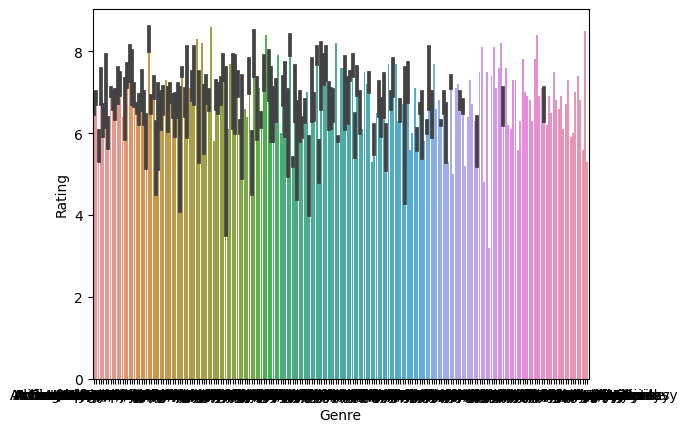

In [72]:
sns.barplot(x='Genre', y='Rating', data=df);

In [71]:
df.groupby(['Genre','Rating']).agg({'Revenue (Millions)':'mean'})

Revenue (Millions)
Genre            Rating                    
Action           4.9                 131.56
                 7.4                    NaN
Action,Adventure 6.0                  72.66
                 6.2                 336.53
                 7.0                 262.03
...                                     ...
Thriller         6.1                    NaN
                 6.3                    NaN
                 6.7                   0.32
                 7.1                    NaN
Thriller,War     6.0                    NaN

[790 rows x 1 columns]